In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
aisles = pd.read_csv("./data/drive/aisles.csv")
departments = pd.read_csv("./data/drive/departments.csv")
prior = pd.read_csv("./data/drive/order_products__prior.csv")
train = pd.read_csv("./data/drive/order_products__train.csv")
orders = pd.read_csv("./data/drive/orders.csv")
products = pd.read_csv("./data/drive/products.csv")

In [3]:
prior_sample = prior[:10000]
prior_sample

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
9995,1022,21903,1,1
9996,1022,38689,2,1
9997,1022,30391,3,1
9998,1022,18670,4,1


In [4]:
# 불러온 모든 테이블을 합칩니다.
temp = pd.merge(orders, prior_sample, on="order_id")
temp = pd.merge(temp, products, on="product_id")
temp = pd.merge(temp, aisles, on="aisle_id")
temp = pd.merge(temp, departments, on="department_id")
temp

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,40,382,prior,29,1,15,23.0,10070,1,1,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
1,235,58701,prior,20,5,9,9.0,10070,7,1,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
2,581,76141,prior,3,6,17,7.0,10070,3,0,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
3,649,135836,prior,1,4,7,NaN,10070,1,0,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
4,40,382,prior,29,1,15,23.0,34866,4,1,Chocolate Milk 1% Milkfat,84,16,milk,dairy eggs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,152,103040,prior,12,1,10,7.0,5161,3,1,Dried Mango,18,10,bulk dried fruits vegetables,bulk
9996,959,119941,prior,2,6,13,21.0,5161,3,1,Dried Mango,18,10,bulk dried fruits vegetables,bulk
9997,400,180454,prior,32,0,8,8.0,5161,3,1,Dried Mango,18,10,bulk dried fruits vegetables,bulk
9998,18,118860,prior,3,4,20,6.0,1000,3,0,Apricots,18,10,bulk dried fruits vegetables,bulk


In [ ]:
# 1만개의 거래내역에 대해서 각 물품을 얼마나 샀을까?
#temp.user_id.value_counts() # 972명의 고객.
#temp.product_name.value_counts()
#temp.aisle.value_counts()
#temp.department.value_counts()
#temp.order_dow.value_counts()
#temp.order_hour_of_day.value_counts()

In [6]:
temp.user_id.value_counts()

149156    46
150739    45
11335     44
119437    39
87889     38
          ..
36916      1
99415      1
160167     1
15161      1
154766     1
Name: user_id, Length: 972, dtype: int64

In [7]:
temp.product_name.value_counts()

Banana                               156
Bag of Organic Bananas               119
Organic Strawberries                  73
Organic Baby Spinach                  70
Organic Hass Avocado                  68
                                    ... 
Organic Bunch Arugula                  1
Russet Potatoes                        1
Organic Whole Crimini Mushrooms        1
Yukon Gold Potatoes                    1
Organic Short Brown Sprouted Rice      1
Name: product_name, Length: 4511, dtype: int64

In [8]:
temp.aisle.value_counts()

fresh fruits                    1128
fresh vegetables                1076
packaged vegetables fruits       514
yogurt                           395
packaged cheese                  313
                                ... 
first aid                          2
beauty                             1
eye ear care                       1
skin care                          1
bulk grains rice dried goods       1
Name: aisle, Length: 133, dtype: int64

In [9]:
temp.department.value_counts()

produce            2913
dairy eggs         1647
snacks              862
beverages           801
frozen              746
pantry              598
canned goods        362
bakery              354
deli                319
dry goods pasta     255
household           249
breakfast           238
meat seafood        225
babies              131
personal care       125
international        86
pets                 28
alcohol              27
missing              15
other                13
bulk                  6
Name: department, dtype: int64

In [10]:
temp.order_dow.value_counts()

1    2135
0    1916
5    1346
6    1333
2    1324
3    1081
4     865
Name: order_dow, dtype: int64

In [5]:
temp.order_hour_of_day.value_counts()

12    903
13    821
9     818
16    815
10    813
11    793
15    775
17    771
14    706
8     601
18    546
20    373
19    335
7     231
22    175
21    172
23    134
6      95
0      76
1      26
4      16
2       5
Name: order_hour_of_day, dtype: int64

In [11]:
# transaction->user-level 단위로 변경하고, User당 정보로 변환하는 과정까지 마무리합니다.
# 1. Department(v)     2. Aisle      3. Product_name

X = pd.crosstab(index=temp.user_id, columns=temp.department)
X

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
382,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,1,0,2,1,0,0,...,0,0,1,0,0,1,0,0,2,0
971,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1059,0,0,3,0,3,0,0,8,0,0,...,0,1,2,0,0,2,0,0,8,2
1177,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204184,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
204484,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,1
204912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


## 클러스터링 모델 적용하기


[K-Means]

- Elbow method를 이용하여 최적의 K값을 찾아보세요.
- sparse한 특징을 가지는 데이터를 클러스터링 하기 위해서는 어떤 기법을 사용해야 할까요?
- 클러스터링 결과를 시각화해보고, 실루엣 지수도 계산해봅시다.

In [12]:
X

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
user_id,,,,,,,,,,,,,,,,,,,,,
382,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
503,0,0,0,0,1,0,2,1,0,0,...,0,0,1,0,0,1,0,0,2,0
971,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1059,0,0,3,0,3,0,0,8,0,0,...,0,1,2,0,0,2,0,0,8,2
1177,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204184,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
204484,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4,1
204912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
# tSNE : 시각화용도의 차원감소 기법. (2차원으로 변환해주는 기법)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(X)
tsne_data

C:\Users\82107\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\82107\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


array([[ 23.323946 , -12.236835 ],
       [ 19.429306 ,  18.126234 ],
       [ 24.698679 ,   2.0066414],
       ...,
       [ 11.98311  ,  -0.9495676],
       [ 24.058369 , -17.70569  ],
       [ -8.431757 ,  10.835056 ]], dtype=float32)

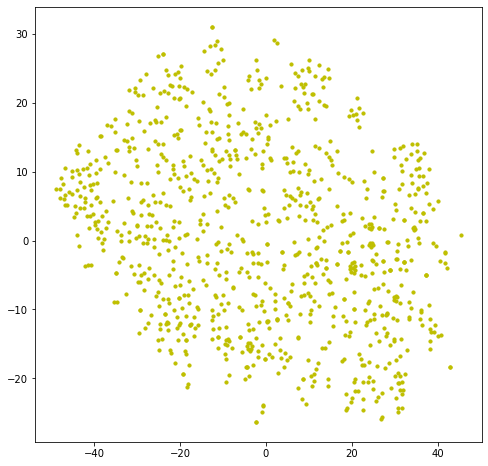

In [14]:
plt.figure(figsize=(8, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s=10, c='y')
plt.show()

In [15]:
# K-means를 돌려봅시다.
from sklearn.cluster import KMeans                    # 1. K-means
from sklearn.cluster import AgglomerativeClustering   # 2. Hierarchical Agglomerative Clustering
from sklearn.cluster import DBSCAN                    # 3. DBSCAN
from sklearn.cluster import SpectralClustering        # 4. Spectral Clustering

from sklearn.metrics import silhouette_score

model = KMeans(n_clusters=4)
model2 = KMeans(n_clusters=2)
# unsupervised setting
pred = model.fit_predict(X)
pred2 = model2.fit_predict(X)
print("Silhouette Score : %.4f" % silhouette_score(X, pred))
print("Silhouette Score : %.4f" % silhouette_score(X, pred2))

Silhouette Score : 0.1910
Silhouette Score : 0.3641


In [16]:
# elbow method
sse = []
silhouettes = []

for K in range(2, 11):
  model = KMeans(n_clusters=K) # K : 2 ~ 10
  pred = model.fit_predict(X)
  sse.append(model.inertia_) # SSE
  silhouettes.append(silhouette_score(X, pred))

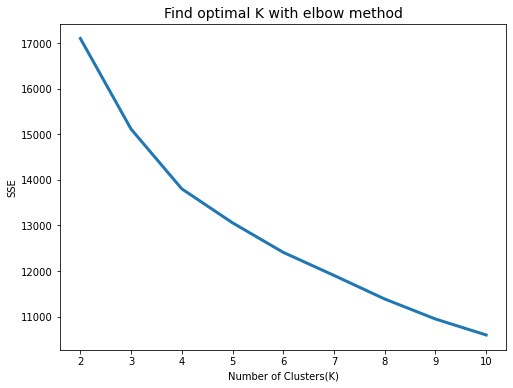

In [17]:
# 최적의 K는 어떻게 구할까요?
# Elbow method : 정해진 K에 대해서 SSE를 계산한 다음, SSE가 가장 많이 꺾이는 K(elbow)가 optimal K라고 판단하는 방법.

plt.figure(figsize=(8, 6))
plt.title("Find optimal K with elbow method", fontsize=14)
plt.xlabel("Number of Clusters(K)", fontsize=10)
plt.ylabel("SSE", fontsize=10)
plt.plot(range(2, 11), sse, lw=3)
plt.show()

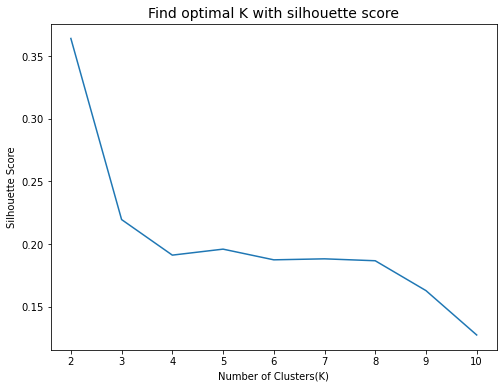

In [18]:
# Silhouette score : 같은 클러스터에 속하는 데이터중 가장 먼 데이터와의 거리와 다른 클러스터에 속하는 데이터 중 가장 가까운 데이터와의 거리 비율을 계산한 지표. [-1, 1]
# Reference : https://en.wikipedia.org/wiki/Silhouette_(clustering)

plt.figure(figsize=(8, 6))
plt.title("Find optimal K with silhouette score", fontsize=14)
plt.xlabel("Number of Clusters(K)", fontsize=10)
plt.ylabel("Silhouette Score", fontsize=10)
plt.plot(range(2, 11), silhouettes)
plt.show()

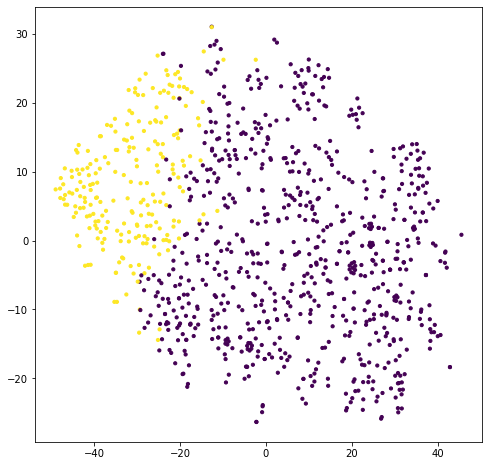

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], s=10, c=pred2, cmap="viridis")
plt.show()

In [20]:
# see summary
X["cluster_label"] = pred2
X["Cluster_label"] = pred
X

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,meat seafood,missing,other,pantry,personal care,pets,produce,snacks,cluster_label,Cluster_label
user_id,,,,,,,,,,,,,,,,,,,,,
382,0,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,8
503,0,0,0,0,1,0,2,1,0,0,...,1,0,0,1,0,0,2,0,0,1
971,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,8
1059,0,0,3,0,3,0,0,8,0,0,...,2,0,0,2,0,0,8,2,1,9
1177,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204184,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
204484,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,4,1,0,1
204912,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,1,0,0,8


In [21]:
group1 = X.loc[X.Cluster_label == 0, :]
group2 = X.loc[X.Cluster_label == 1, :]
group3 = X.loc[X.Cluster_label == 2, :]
group4 = X.loc[X.Cluster_label == 3, :]
print(group1.shape, group2.shape, group3.shape, group4.shape)

(60, 23) (218, 23) (51, 23) (113, 23)


In [22]:
group1.mean()

department
alcohol            0.033333
babies             0.000000
bakery             0.233333
beverages          3.933333
breakfast          0.450000
bulk               0.000000
canned goods       0.333333
dairy eggs         1.183333
deli               0.266667
dry goods pasta    0.150000
frozen             0.716667
household          0.433333
international      0.066667
meat seafood       0.166667
missing            0.000000
other              0.050000
pantry             0.333333
personal care      0.150000
pets               0.033333
produce            1.050000
snacks             1.166667
cluster_label      0.016667
Cluster_label      0.000000
dtype: float64

In [23]:
group2.mean()

department
alcohol            0.013761
babies             0.100917
bakery             0.279817
beverages          0.394495
breakfast          0.123853
bulk               0.004587
canned goods       0.243119
dairy eggs         0.752294
deli               0.298165
dry goods pasta    0.211009
frozen             0.371560
household          0.220183
international      0.059633
meat seafood       0.169725
missing            0.009174
other              0.004587
pantry             0.463303
personal care      0.064220
pets               0.000000
produce            2.766055
snacks             0.444954
cluster_label      0.000000
Cluster_label      1.000000
dtype: float64

In [24]:
group3.mean()

department
alcohol             0.000000
babies              0.254902
bakery              0.568627
beverages           1.078431
breakfast           0.333333
bulk                0.058824
canned goods        0.843137
dairy eggs          2.960784
deli                0.960784
dry goods pasta     0.333333
frozen              1.274510
household           0.176471
international       0.137255
meat seafood        0.274510
missing             0.019608
other               0.000000
pantry              1.019608
personal care       0.098039
pets                0.078431
produce            11.823529
snacks              0.980392
cluster_label       1.000000
Cluster_label       2.000000
dtype: float64

In [25]:
group4.mean()

department
alcohol            0.008850
babies             0.176991
bakery             0.318584
beverages          0.522124
breakfast          0.185841
bulk               0.008850
canned goods       0.619469
dairy eggs         1.345133
deli               0.292035
dry goods pasta    0.300885
frozen             0.513274
household          0.141593
international      0.115044
meat seafood       0.398230
missing            0.008850
other              0.017699
pantry             0.575221
personal care      0.079646
pets               0.026549
produce            6.150442
snacks             0.309735
cluster_label      0.725664
Cluster_label      3.000000
dtype: float64